In [1]:
import pandas as pd

df = pd.read_csv("jitensha.csv")
df.head()

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,被害者の年齢,被害者の職業,施錠関係
0,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240117,23,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,20歳代,大学生,施錠した
1,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240227,18,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
2,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240528,20,駐車（輪）場,駐車（輪）場,40歳代,その他,施錠した
3,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240627,21,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
4,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240917,14,その他,その他,20歳代,その他,施錠せず


市区町村ごとの被害件数

In [2]:
df.groupby('市区町村（発生地）').size().sort_values(ascending=False)

市区町村（発生地）
船橋市        1263
市川市         872
柏市          691
松戸市         678
千葉市中央区      656
八千代市        458
習志野市        450
浦安市         435
野田市         367
千葉市稲毛区      334
千葉市美浜区      328
千葉市若葉区      313
流山市         302
千葉市花見川区     290
市原市         285
千葉市緑区       213
成田市         211
四街道市        165
木更津市        157
佐倉市         146
鎌ケ谷市        140
印西市         125
八街市         115
我孫子市        114
東金市         103
茂原市          94
君津市          84
旭市           64
白井市          63
館山市          52
富津市          45
袖ケ浦市         42
富里市          31
銚子市          30
酒々井町         30
大網白里市        26
山武市          24
香取市          22
一宮町          21
鴨川市          16
いすみ市         15
栄町           14
横芝光町         11
匝瑳市           9
長生村           9
南房総市          8
鋸南町           5
多古町           4
九十九里町         3
東庄町           3
神崎町           2
勝浦市           1
御宿町           1
睦沢町           1
白子町           1
dtype: int64

発生時期

In [3]:
df.groupby('発生時（始期）').size().sort_values(ascending=False)

発生時（始期）
7     919
18    875
17    859
16    695
8     675
19    606
12    508
20    500
15    473
10    433
21    413
9     411
13    390
14    388
11    371
6     333
22    311
23    229
0     167
不明    115
5     113
1      74
2      32
4      30
3      23
dtype: int64

施錠していたかどうか

In [4]:
df.groupby('施錠関係').size()

施錠関係
施錠した    3162
施錠せず    6781
dtype: int64

月別発生件数

In [5]:
df['発生日'] = pd.to_datetime(df['発生年月日（始期）'], format="%Y%m%d", errors='coerce')
df['月'] = df['発生日'].dt.month
df.groupby('月').size()

月
1.0      620
2.0      569
3.0      681
4.0      761
5.0      813
6.0      826
7.0     1027
8.0      943
9.0      984
10.0     956
11.0     888
12.0     782
dtype: int64

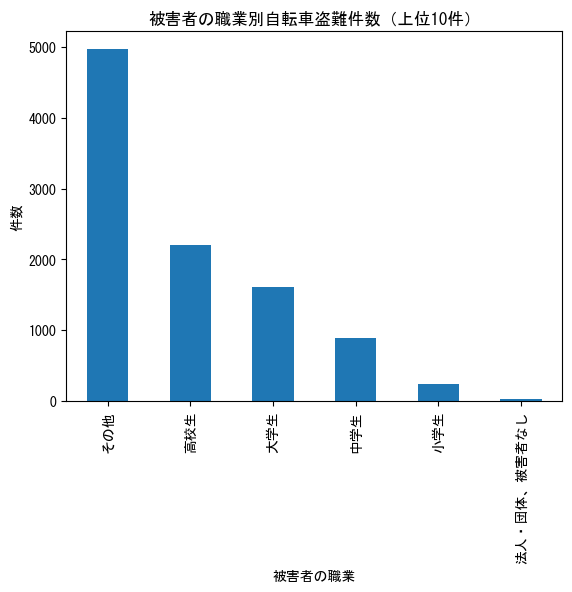

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Hiragino Sans'

plt.rcParams['font.family'] = 'MS Gothic'

occupation_counts = df['被害者の職業'].value_counts().head(10)  
occupation_counts.plot(kind='bar')

plt.xlabel('被害者の職業')
plt.ylabel('件数')
plt.title('被害者の職業別自転車盗難件数（上位10件）')
plt.show()

市区町村ごとの盗難発生件数(グラフ)

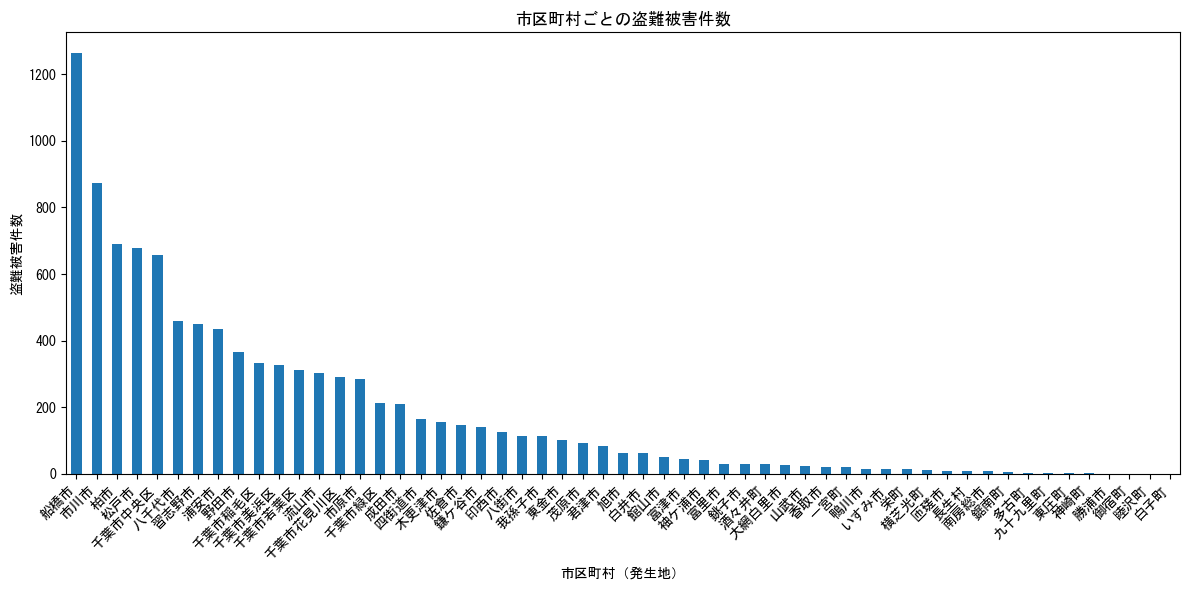

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("jitensha.csv")

df_theft = df[df["罪名"].str.contains("盗", na=False)]

grouped = df_theft.groupby("市区町村（発生地）").size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
grouped.plot(kind="bar")
plt.title("市区町村ごとの盗難被害件数")
plt.xlabel("市区町村（発生地）")
plt.ylabel("盗難被害件数")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


場所別の盗難件数

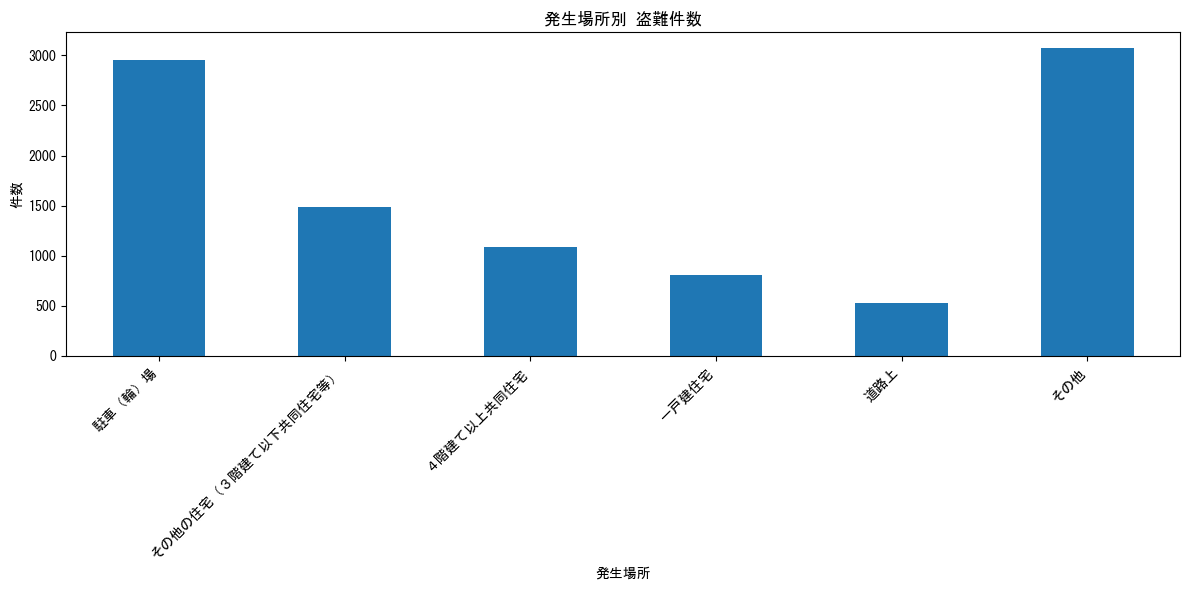

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("jitensha.csv")

df_theft = df[df["罪名"].str.contains("盗", na=False)]

place_counts = df_theft["発生場所"].value_counts()

if "その他" in place_counts.index:
    other_value = place_counts["その他"]
    place_counts = place_counts.drop("その他")
    place_counts.loc["その他"] = other_value

plt.figure(figsize=(12, 6))
place_counts.plot(kind="bar")

plt.title("発生場所別 盗難件数")
plt.xlabel("発生場所")
plt.ylabel("件数")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


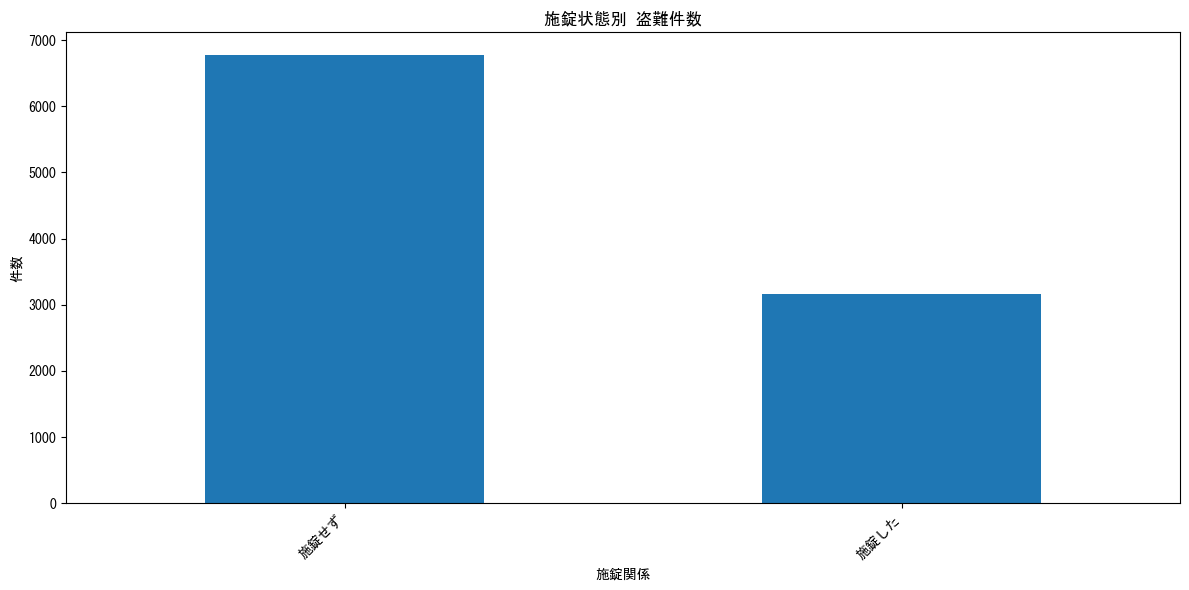

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("jitensha.csv")

df_theft = df[df["罪名"].str.contains("盗", na=False)]

lock_counts = (
    df_theft["施錠関係"]
    .value_counts()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
lock_counts.plot(kind="bar")

plt.title("施錠状態別 盗難件数")
plt.xlabel("施錠関係")
plt.ylabel("件数")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


グラフ画像一覧



分析など

やはり千葉市や船橋市のような都会のエリアは盗難被害件数が多かった。千葉市は複数の区ごとにデータがあるため、一見船橋市が一番多いように見えなくもないが実際は千葉市が一番多かった。千葉県の人口ランキングtop5は多い順に千葉市、船橋市、松戸市、市川市、柏市であり、その5つの市すべてが盗難件数ランキングtop5にランクインしていた(千葉、船橋、市川、柏、松戸の順で多い)ため、盗難件数とその市の人口の多さはほぼ比例の関係にあるとみていいだろうと思った。また、自分が思っていたよりも盗難が発生していることも分かった。自分は船橋市住みなので、盗難に遭いやすい可能性があるため注意する必要があると思った。場所についても、駐輪場が一番多く、たくさんの自転車があり、家と違ってその自転車が誰のものなのかを周りの人が判断しづらいからなのではないかと思った。施錠状態別の記録を見ると、しっかり施錠していてもそこそこの数の自転車が盗まれていることが分かるため、二十ロックなど、より盗みづらい状況をつくることが大事だと思う。
グラフでの可視化をして、そのままだと基本的に一番多くなるその他が一番左に来てしまい、最初のグラフのように少し見づらいグラフになってしまったので、3枚目のグラフではその他を一番右に寄せて見やすくしてみた。